In [ ]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file = "/home/sysadmin/Martin/opm-thesis/data/digits_epochs/freq_bands/all_data_all_epochs.pkl"

epochs = pickle.load(open(file, "rb"))

In [19]:
# Assuming 'epochs' is your MNE epochs object
data = epochs.get_data()
channel_names = epochs.ch_names

# Replace these with the actual indices for X, Y, Z channels
x_indices = [epochs.ch_names.index(ch) for ch in channel_names if "[X]" in ch]
y_indices = [epochs.ch_names.index(ch) for ch in channel_names if "[Y]" in ch]
z_indices = [epochs.ch_names.index(ch) for ch in channel_names if "[Z]" in ch]

In [47]:
# Function to compute the correlation matrix
def compute_corr_matrix(data):
    if len(data.shape) == 3:
      flattened_data = data.reshape(data.shape[1], data.shape[0] * data.shape[2])
    elif len(data.shape) == 2:
      flattened_data = data
    return np.corrcoef(flattened_data)


def plot_corr_matrix(x_data, y_data, z_data):
    # Compute correlation matrices
    corr_matrix_x = compute_corr_matrix(x_data)
    corr_matrix_y = compute_corr_matrix(y_data)
    corr_matrix_z = compute_corr_matrix(z_data)

    # Plotting all three correlation matrices in the same row
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    sns.heatmap(corr_matrix_x, ax=axes[0], annot=False, cmap="Reds", cbar=True)
    axes[0].set_title("Correlation Matrix of X Sensors")
    axes[0].set_xlabel("Sensor")
    axes[0].set_ylabel("Sensor")

    sns.heatmap(corr_matrix_y, ax=axes[1], annot=False, cmap="Reds", cbar=True)
    axes[1].set_title("Correlation Matrix of Y Sensors")
    axes[1].set_xlabel("Sensor")
    axes[1].set_ylabel("Sensor")

    sns.heatmap(corr_matrix_z, ax=axes[2], annot=False, cmap="Reds", cbar=True)
    axes[2].set_title("Correlation Matrix of Z Sensors")
    axes[2].set_xlabel("Sensor")
    axes[2].set_ylabel("Sensor")

    plt.tight_layout()
    plt.show()

    return corr_matrix_x, corr_matrix_y, corr_matrix_z


def extract_significant_correlations(corr_matrix, threshold):
    # Using a list comprehension and np.triu_indices to get the upper triangle index pairs, excluding the diagonal
    significant_pairs = [
        [i, j, corr_matrix[i, j]]
        for i, j in zip(*np.triu_indices_from(corr_matrix, k=1))
        if np.abs(corr_matrix[i, j]) > threshold
    ]
    return significant_pairs

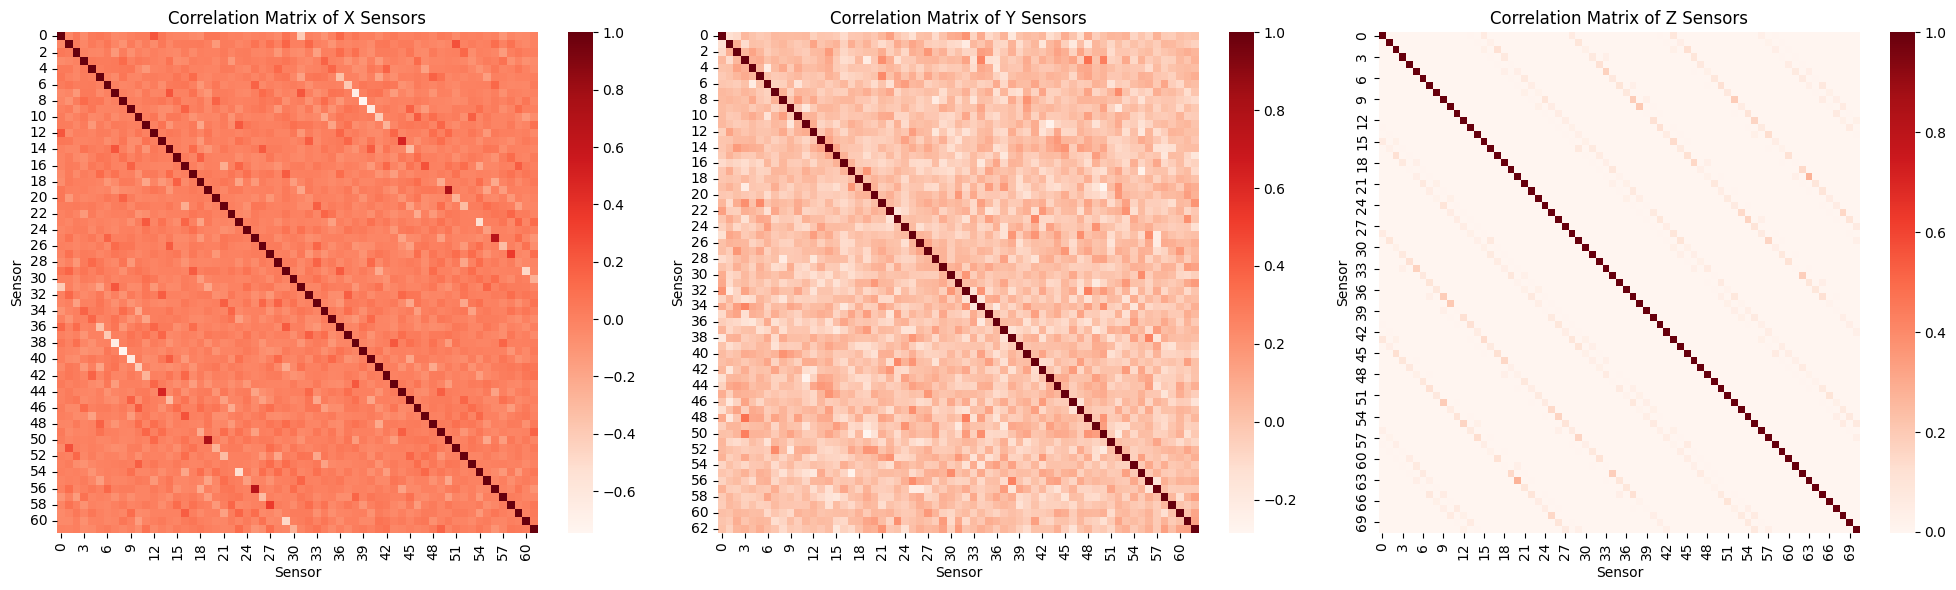

Significant pairs for X sensors: [[7, 38, -0.6607788373676795], [8, 39, -0.746027096148275], [9, 40, -0.6328661441085882], [19, 50, 0.731757682928012], [23, 54, -0.5214390262926147], [25, 56, 0.6685030960925541]]
Significant pairs for Y sensors: []
Significant pairs for Z sensors: []


In [48]:
# Separate the data
x_data = data[:, x_indices, :]
y_data = data[:, y_indices, :]
z_data = data[:, z_indices, :]

corr_matrix_x, corr_matrix_y, corr_matrix_z = plot_corr_matrix(x_data, y_data, z_data)
THRESHOLD = 0.5

significant_pairs_x = extract_significant_correlations(corr_matrix_x, THRESHOLD)
significant_pairs_y = extract_significant_correlations(corr_matrix_y, THRESHOLD)
significant_pairs_z = extract_significant_correlations(corr_matrix_z, THRESHOLD)

# You can now print out the results or process them further as needed
print("Significant pairs for X sensors:", significant_pairs_x)
print("Significant pairs for Y sensors:", significant_pairs_y)
print("Significant pairs for Z sensors:", significant_pairs_z)

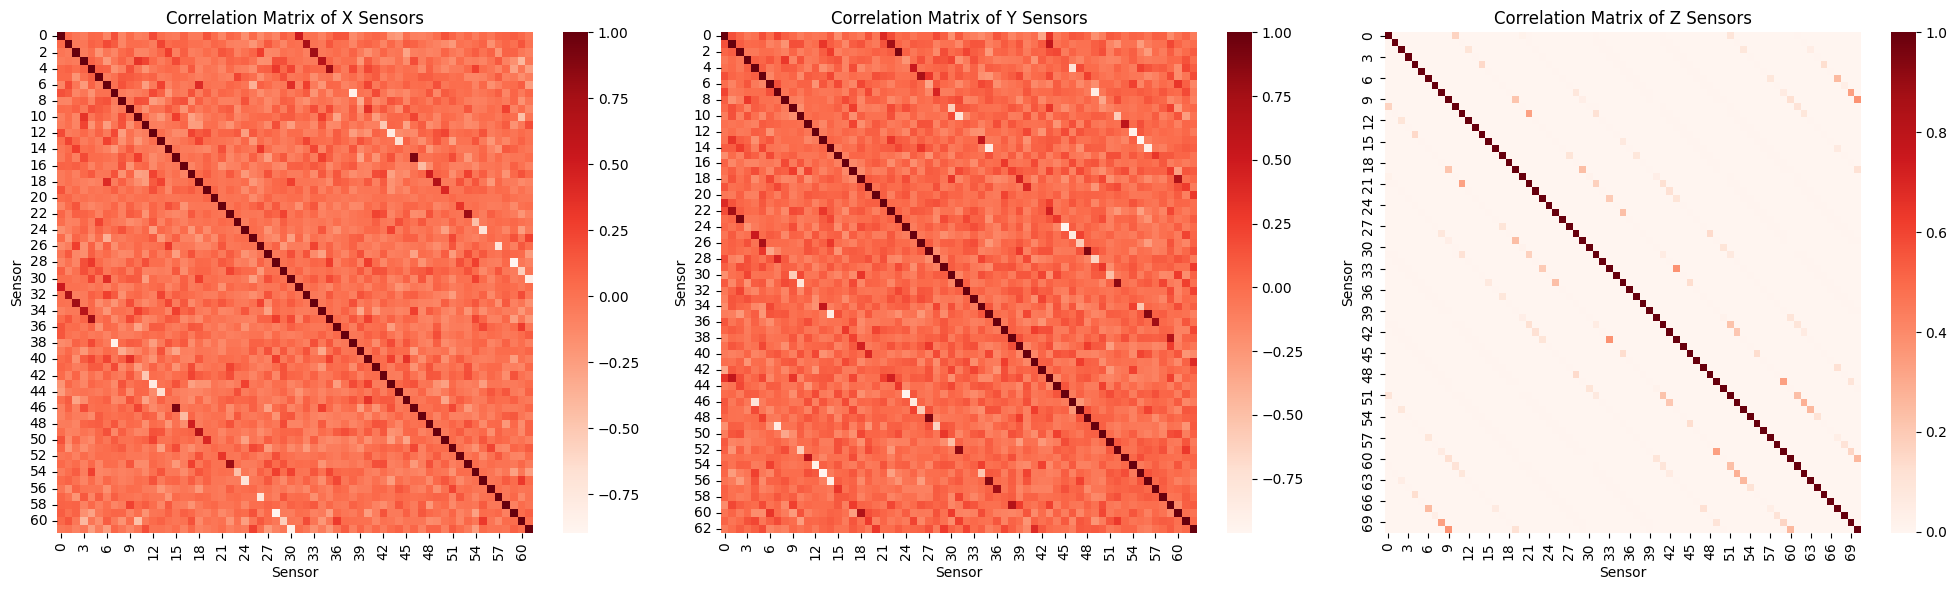

Significant pairs for X sensors: [[0, 31, 0.5145983108592384], [1, 32, 0.7296995008635907], [2, 33, 0.7715202979241963], [3, 34, 0.6438784165571757], [4, 35, 0.7728091175357612], [7, 38, -0.8498728094070123], [12, 43, -0.7830850875346103], [13, 44, -0.6560009949568683], [15, 46, 0.9137960854576705], [18, 49, 0.6674665428943379], [22, 53, 0.7912073137708094], [24, 55, -0.6957315973211793], [26, 57, -0.7255789945583384], [28, 59, -0.8959696703984846], [29, 60, -0.5424446131663244], [30, 61, -0.8081029152926795]]
Significant pairs for Y sensors: [[1, 22, 0.7484734286596332], [1, 43, 0.5615011953738536], [2, 23, 0.9226889514928248], [4, 25, 0.5111430131478332], [4, 46, -0.7578447103694153], [5, 26, 0.7136991597519206], [7, 49, -0.8560707351981864], [9, 30, -0.5900538609074314], [10, 31, -0.78376854283288], [10, 52, -0.5894476344924232], [11, 53, 0.5869990534306256], [12, 54, -0.913409124437756], [13, 34, 0.558265877315201], [13, 55, -0.9627823819903196], [14, 35, -0.8613865231520833], [14,

In [36]:
data_thumb = epochs.get_data()[epochs.events[:, 2] == 8]

x_data_thumb = data_thumb[:, x_indices, :]
y_data_thumb = data_thumb[:, y_indices, :]
z_data_thumb = data_thumb[:, z_indices, :]

c_thumb_x, c_thumb_y, c_thumb_z = plot_corr_matrix(
    x_data_thumb, y_data_thumb, z_data_thumb
)
THRESHOLD = 0.5

significant_pairs_x_thumb = extract_significant_correlations(c_thumb_x, THRESHOLD)
significant_pairs_y_thumb = extract_significant_correlations(c_thumb_y, THRESHOLD)
significant_pairs_z_thumb = extract_significant_correlations(c_thumb_z, THRESHOLD)

# You can now print out the results or process them further as needed
print("Significant pairs for X sensors:", significant_pairs_x_thumb)
print("Significant pairs for Y sensors:", significant_pairs_y_thumb)
print("Significant pairs for Z sensors:", significant_pairs_z_thumb)

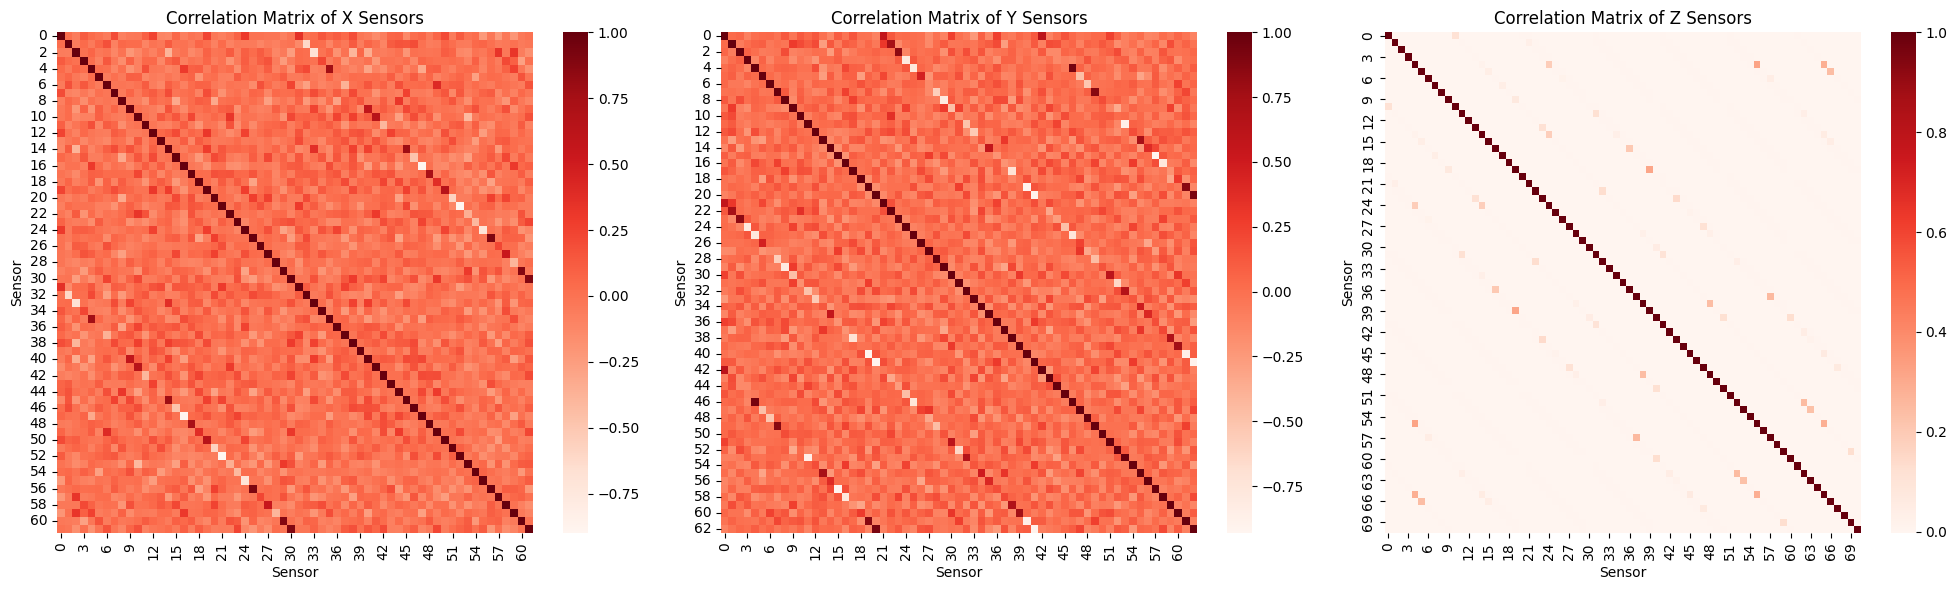

Significant pairs for X sensors: [[1, 32, -0.6058788984564732], [2, 33, -0.6801105409217084], [4, 35, 0.766639387875327], [9, 40, 0.5885382699483342], [10, 41, 0.6380847230331981], [14, 45, 0.7832918060520235], [16, 47, -0.8936701955124743], [17, 48, 0.7342446159165887], [19, 50, 0.6442855898689703], [20, 51, -0.5788646432307988], [21, 52, -0.8988027666830107], [24, 55, -0.7123781831047052], [25, 56, 0.9045636859577914], [27, 58, 0.5434779730155649], [29, 60, 0.8849332676725159], [30, 61, 0.8960000031336688]]
Significant pairs for Y sensors: [[0, 21, 0.5730633047333096], [0, 42, 0.611370065513269], [1, 22, 0.7422268853776273], [2, 23, 0.8480358133878325], [3, 24, -0.7903936122336287], [4, 25, -0.7714254472518836], [4, 46, 0.9464176417165332], [6, 48, -0.5187514916146168], [7, 28, -0.5756734331054215], [7, 49, 0.8691139755840395], [8, 29, -0.8022002611712035], [11, 53, -0.8620546267963742], [12, 33, -0.5455802002942446], [13, 55, 0.742167869567893], [14, 35, 0.5633574468447078], [15, 57

In [37]:
data_pinky = epochs.get_data()[epochs.events[:, 2] == 128]

x_data_pinky = data_pinky[:, x_indices, :]
y_data_pinky = data_pinky[:, y_indices, :]
z_data_pinky = data_pinky[:, z_indices, :]

c_pinky_x, c_pinky_y, c_pinky_z = plot_corr_matrix(
    x_data_pinky, y_data_pinky, z_data_pinky
)

significant_pairs_x_pinky = extract_significant_correlations(c_pinky_x, THRESHOLD)
significant_pairs_y_pinky = extract_significant_correlations(c_pinky_y, THRESHOLD)
significant_pairs_z_pinky = extract_significant_correlations(c_pinky_z, THRESHOLD)

# You can now print out the results or process them further as needed
print("Significant pairs for X sensors:", significant_pairs_x_pinky)
print("Significant pairs for Y sensors:", significant_pairs_y_pinky)
print("Significant pairs for Z sensors:", significant_pairs_z_pinky)

In [58]:
# Convert the list of lists to a list of tuples for easier processing
significant_pairs_x_thumb_tuples = [tuple(pair) for pair in significant_pairs_x_thumb]
significant_pairs_x_pinky_tuples = [tuple(pair) for pair in significant_pairs_x_pinky]

# Create dictionaries from the pairs to their correlation values for easy lookup
thumb_dict = {pair[:2]: pair[2] for pair in significant_pairs_x_thumb_tuples}
pinky_dict = {pair[:2]: pair[2] for pair in significant_pairs_x_pinky_tuples}

# Find common pairs
common_pairs = set(thumb_dict).intersection(pinky_dict)

# Print the common pairs with their correlation values for thumb and pinky
for pair in common_pairs:
    print(
        f"Pair: {pair}, Thumb correlation: {thumb_dict[pair]}, Pinky correlation: {pinky_dict[pair]}"
    )

Pair: (2, 33), Thumb correlation: 0.7715202979241963, Pinky correlation: -0.6801105409217084
Pair: (4, 35), Thumb correlation: 0.7728091175357612, Pinky correlation: 0.766639387875327
Pair: (24, 55), Thumb correlation: -0.6957315973211793, Pinky correlation: -0.7123781831047052
Pair: (30, 61), Thumb correlation: -0.8081029152926795, Pinky correlation: 0.8960000031336688
Pair: (1, 32), Thumb correlation: 0.7296995008635907, Pinky correlation: -0.6058788984564732
Pair: (29, 60), Thumb correlation: -0.5424446131663244, Pinky correlation: 0.8849332676725159


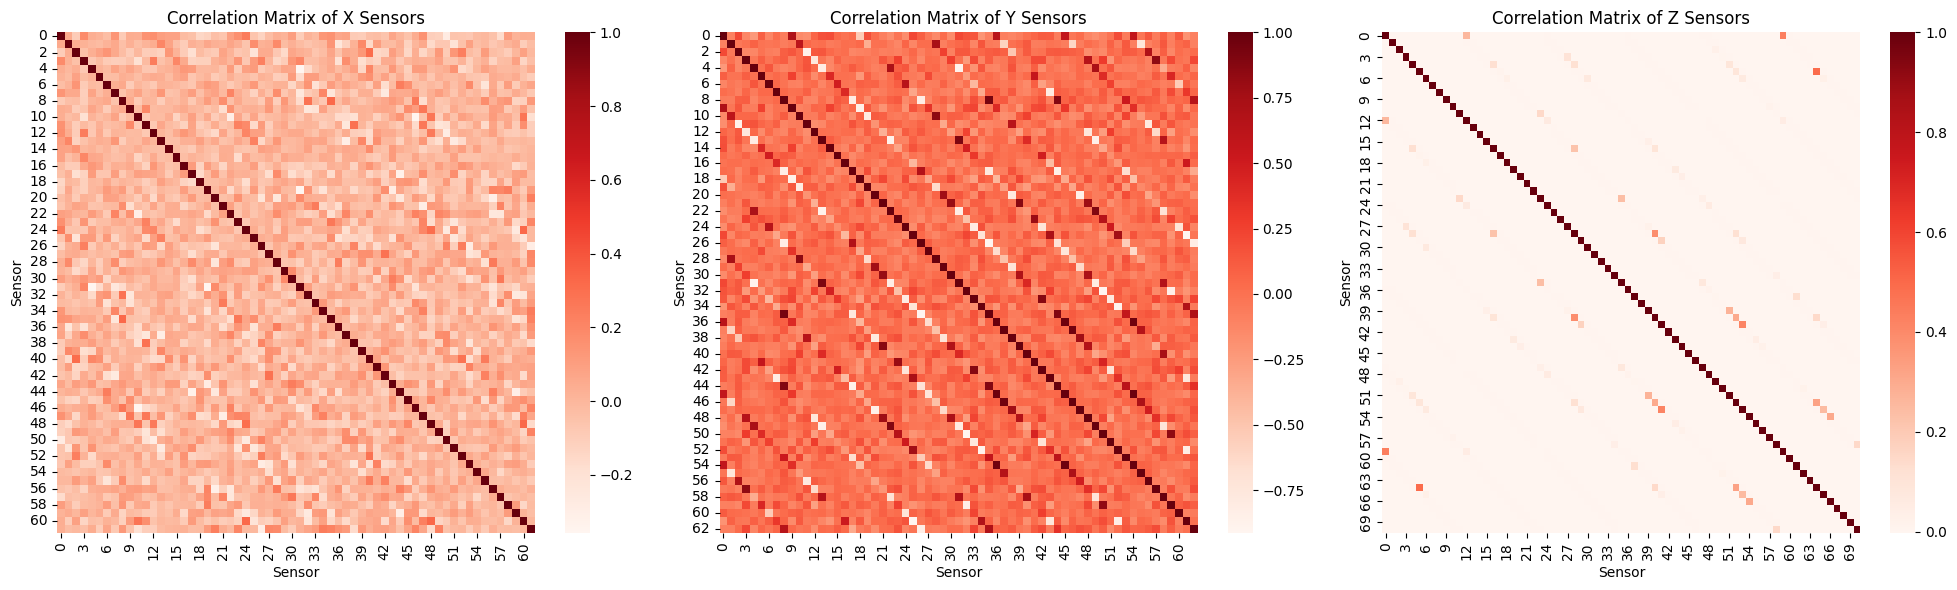

Significant pairs for X sensors: []
Significant pairs for Y sensors: [[0, 9, 0.6998557910455872], [0, 18, -0.5348258040683753], [0, 36, 0.6284486703496274], [0, 45, 0.5780537059421883], [0, 54, 0.587680227132142], [1, 10, 0.6164116277667291], [1, 28, 0.7315778689942044], [1, 37, -0.5865388602086891], [1, 46, -0.6110142902990928], [1, 55, -0.7440521014418391], [2, 11, -0.8681420672044828], [2, 38, -0.5118241628294309], [2, 56, 0.6886611635205204], [3, 12, -0.7565271468908934], [3, 48, 0.6534126361395372], [3, 57, 0.8423118255448842], [4, 13, -0.8118212334675659], [4, 22, 0.7139108127302967], [4, 31, -0.8800061470347662], [4, 49, 0.7271355303886237], [5, 41, 0.5597935945291912], [6, 24, 0.6407094198017785], [6, 60, -0.5466129408557148], [7, 43, -0.8025419181808953], [8, 17, -0.8128356357776892], [8, 26, -0.8227307839975678], [8, 35, 0.9366068113673147], [8, 44, 0.8896939353804699], [8, 53, 0.5149231007959134], [8, 62, 0.6371978312034714], [9, 18, -0.8494606294508353], [10, 19, -0.8041877

In [60]:
data_middle = epochs.get_data()[epochs.events[:, 2] == 32]

x_data_middle = data_middle[:, x_indices, :]
y_data_middle = data_middle[:, y_indices, :]
z_data_middle = data_middle[:, z_indices, :]

c_middle_x, c_middle_y, c_middle_z = plot_corr_matrix(
    x_data_middle, y_data_middle, z_data_middle
)

significant_pairs_x_middle = extract_significant_correlations(c_middle_x, THRESHOLD)
significant_pairs_y_middle = extract_significant_correlations(c_middle_y, THRESHOLD)
significant_pairs_z_middle = extract_significant_correlations(c_middle_z, THRESHOLD)

# You can now print out the results or process them further as needed
print("Significant pairs for X sensors:", significant_pairs_x_middle)
print("Significant pairs for Y sensors:", significant_pairs_y_middle)
print("Significant pairs for Z sensors:", significant_pairs_z_middle)

In [72]:
data_middle = epochs.get_data()[epochs.events[:, 2] == 32][0]

x_data_middle = data_middle[x_indices, :]
y_data_middle = data_middle[y_indices, :]
z_data_middle = data_middle[z_indices, :]

np.corrcoef(flattened_data)

c_middle_x, c_middle_y, c_middle_z = plot_corr_matrix(
    x_data_middle, y_data_middle, z_data_middle
)

ValueError: cannot reshape array of size 302463 into shape (1,196,4801)